In [36]:
import numerical_functions.numba_funcs.sorting_and_searching as sas
from numerical_functions.misc.timer import Timer
import numpy as np

In [37]:
x = np.array( [ 3, 2, 1 ] )
r = sas.merge( x )
print( r )

[1 2 3]


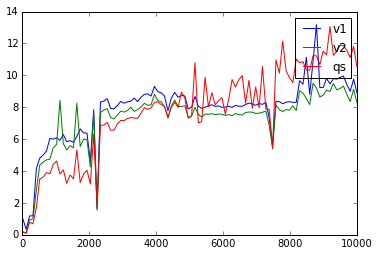

In [174]:
n0 = 20
n1 = 10000
m  = 1

ns     = np.floor( np.linspace( n0, n1, 100 ) )
#ns     = np.arange( n0, n1 )
ratios = np.empty_like( ns )
ratios2 = np.empty_like( ns )
ratios_qs = np.empty_like( ns )
for i, n in enumerate( ns ):
    x = np.random.random_integers( 0, 100, size=n )

    with Timer() as t0:        
        for _ in range( m ):
            r0 = sas.merge( x )
    with Timer() as t0b:        
        for _ in range( m ):
            r1 = sas.merge2( x )
    r_qs = x.copy()
    with Timer() as t0_qs:  
        for _ in range( m ):
            sas.quick_sort( r_qs )
    with Timer() as t1:
        for _ in range( m ):
            e = np.sort( x, kind='merge' )
    #print( 'nb/np performance %s %s'%(n, t0.interval/t1.interval ))
    np.testing.assert_equal( e, r0 )
    np.testing.assert_equal( e, r1 )
    np.testing.assert_equal( e, r_qs )
    ratios[i] = t0.interval/t1.interval
    ratios2[i] = t0b.interval/t1.interval
    ratios_qs[i] = t0_qs.interval/t1.interval
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot( ns, ratios, label='v1' )
plt.plot( ns, ratios2, label='v2' )
plt.plot( ns, ratios_qs, label='qs' )
plt.legend()